### Apply the 'gettig started' Turorial to our dataset (aggregation by week)

In [27]:
import pandas as pd
from fbprophet import Prophet

In [32]:
df = pd.read_csv('../../data/cleaned/weekseries_04_18.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(783,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 778  2018-12-02  261
 779  2018-12-09  274
 780  2018-12-16  275
 781  2018-12-23  234
 782  2018-12-30  150)

In [33]:
m = Prophet(yearly_seasonality=10) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
# m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=20,freq='W',include_history=False)
future.head(2)

,ds
0,2019-01-06
1,2019-01-13


In [35]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
15,2019-04-21,212.762769,180.068573,246.450861
16,2019-04-28,216.133765,181.845119,249.055742
17,2019-05-05,222.197645,185.334354,254.666623
18,2019-05-12,225.404124,192.269417,259.015972
19,2019-05-19,224.489228,191.108302,258.413213


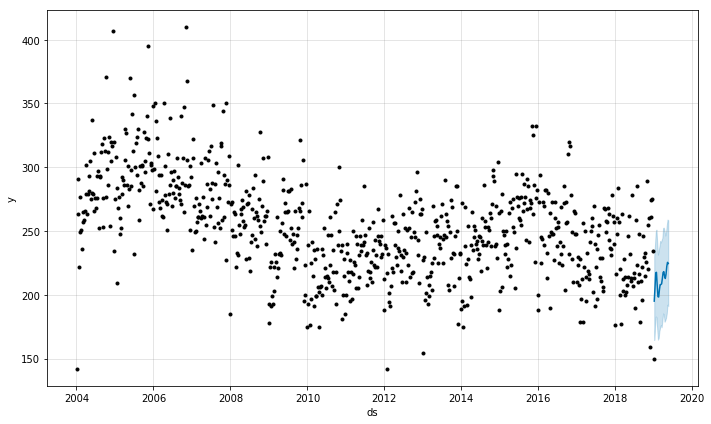

In [36]:
fig1 = m.plot(forecast)

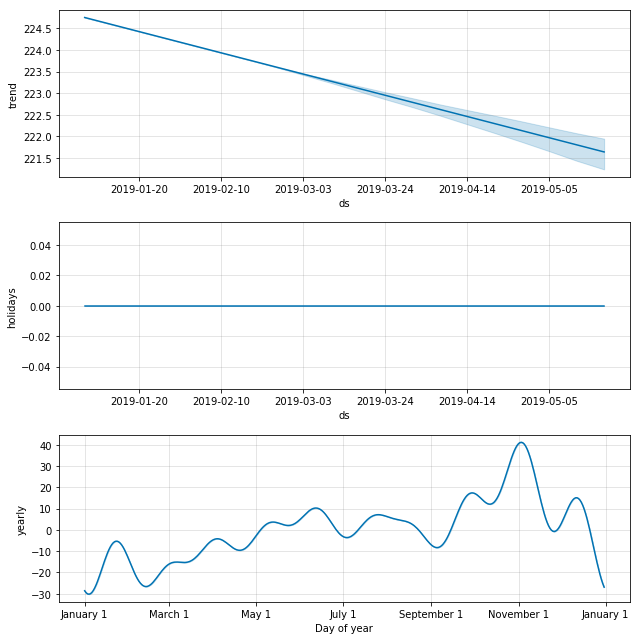

In [37]:
fig2 = m.plot_components(forecast)

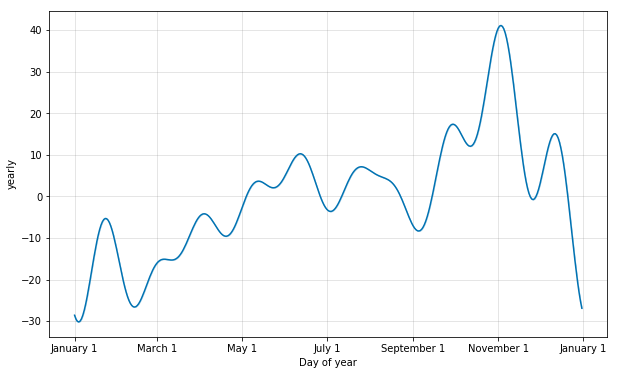

In [38]:
from fbprophet import plot as pl
a = pl.plot_yearly(m)

In [39]:
import matplotlib.pyplot as plt

In [40]:
x = forecast.index.values[:52]
y = forecast['yhat'][:52]
len(y)

20

In [41]:
df_act = pd.read_csv('../../data/cleaned/weekseries_19.csv')
yr = df_act.acc_nr.values[:20]

In [42]:
len(yr)

20

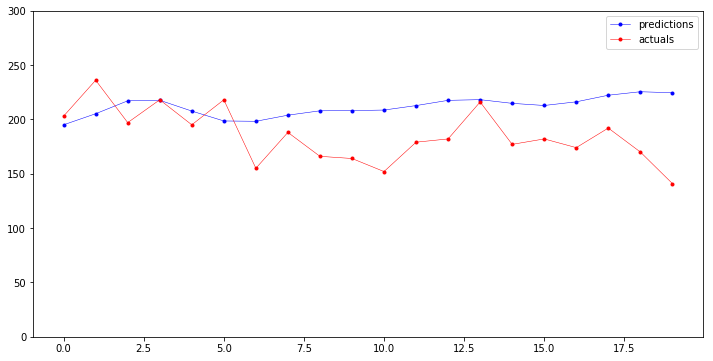

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,yr, 'r.-', label='actuals', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,yr)

1423.111788363674

Baselines: mean in 2018: 

In [46]:
y_base=[yr.mean()]*len(yr)
mean_squared_error(y_base,yr)

577.7875

Mean in 2017 as baseline:

In [25]:
df_17 = pd.read_csv('../../data/cleaned/ic_weekseries_17.csv')
y17 = df_17.acc_nr.values

In [26]:
y_m17=[y17.mean()]*len(y)

In [17]:
mean_squared_error(y_m17,yr)

100.75423775227975

#### Smooth out actuals (rolling window)

In [97]:
df_act.set_index('ds', inplace=True)

In [98]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

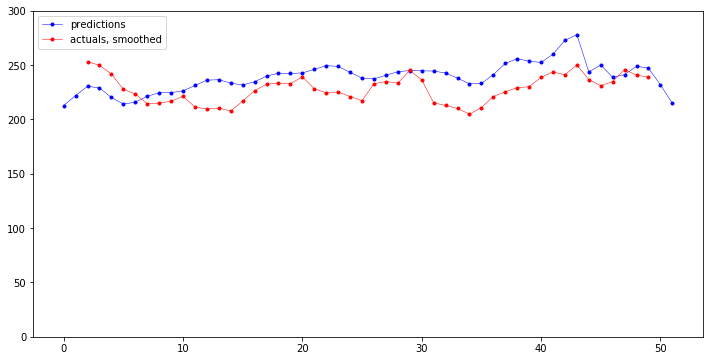

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [83]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])

342.9241824867493

#### Smooth out both actuals and predictions

In [94]:
fc_ds = forecast[['ds','yhat']][:52]
fc_ds.set_index('ds', inplace=True)

In [95]:
rolling_fc = fc_ds.rolling(5, center=True)
mean_fc = rolling_fc.mean()
yfcm = mean_fc.yhat.values

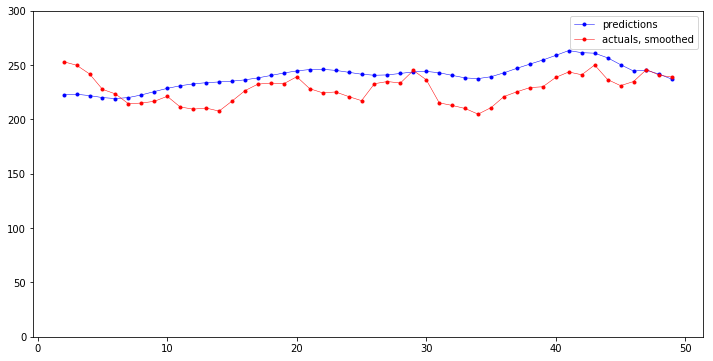

In [100]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,yfcm, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [101]:
mean_squared_error(yfcm[pd.notnull(ym)],ym[pd.notnull(ym)])

334.5845681011313

However, the mean is a better predictor:

In [17]:
ym[pd.notnull(ym)].mean()

NameError: name 'ym' is not defined

In [109]:
ys = [ym[pd.notnull(ym)].mean()]*len(ym[pd.notnull(ym)])

In [110]:
mean_squared_error(ys,ym[pd.notnull(ym)])

156.31692708333333